# Chapter 1 Exercises
# 
We approach this notebook following the textbook content, as available in the notes.md markdown file. 

# Manifolds

For convenience, we restate the definition here:
### **Definition 1.1** - **$M$-Dimensional Manifold**
An **$m$-dimensional manifold** is a set **$M$**, together with a countable collection of subsets **$U_{\alpha} \sub M$**, called ***coordinate charts***, and one-to-one functions **$\Chi_\alpha \colon U_\alpha \mapsto V_\alpha$** onto connected oopen subsets **$V_{\alpha}\sub \R^m$**, called ***local coordinate maps***, which satisfy the following properties:

*a)* The ***coordinate*** charts *cover* **$M$**:
$$\bigcup_{\alpha} U_{\alpha} = M$$

*b)* On the overlap of any pair of coordinate charts, $U_{\alpha}\cap U_{\beta}$ the composite map
$$
\chi_{\beta}\circ \chi_{\alpha}^{-1}\colon \chi_{\alpha}(
    U_{\alpha}\cap U_{\beta}
) \mapsto \chi_{\beta}(
    U_{\alpha}\cap U_{\beta}
)
$$

is a smooth (***inifinitely differentiable***) function.

*c)* If $x \in U_{\alpha}$ and $\tilde x \in U_{\beta}$ are distinct points of **$M$**, then there exists open subsets $W\sub V_{\alpha}$, $\tilde W \sub V_{\beta}$ with $\chi_{\alpha}(x)\in W$, $\chi_{\beta}(\tilde x)\in \tilde W$, satisfying
$$
\chi_{\alpha}^{-1}(W)\cap\chi_{\beta}^{-1}(\tilde W) = \emptyset
$$

We'll proceed with some simple examples based on Definition 1.1, which will help us gain a deeper understanding of manifolds and their properties.

## Example 1: $S^{1}, S^{2}$, and $S^{3}$

### $S^{1} = \{(x, y)\colon x^2 + y^2 = 1\}$


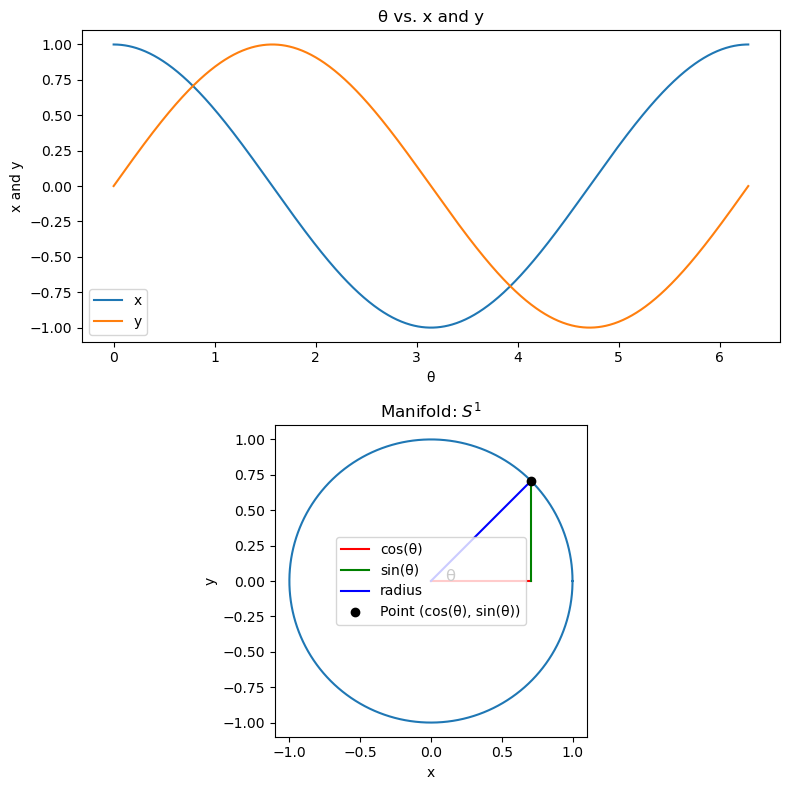

In [190]:
import torch
import matplotlib.pyplot as plt

# An easy example to start with to explore the definition of a manifold is S^1, the circle. We can parameterize the circle
# such that it can be defined in terms of a single parameter, theta, as follows:
# x = cos(theta)
# y = sin(theta)

# The circle is a 1-dimensional manifold, so we can define it as a
# 1-dimensional tensor. We'll use 1000 points to define the circle.
theta = torch.linspace(0, 2 * torch.pi, 1000)
x = torch.cos(theta)
y = torch.sin(theta)

# Create a figure with two subplots: x and y as functions of theta, and x plotted against y with an example right triangle
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Plot x and y as functions of theta
axs[0].plot(theta, x, label='x')
axs[0].plot(theta, y, label='y')
axs[0].set_title('\u03B8 vs. x and y')
axs[0].set_xlabel('\u03B8')
axs[0].set_ylabel('x and y')
axs[0].legend()

# Plot x vs y and the right triangle with the corresponding angle 
axs[1].plot(x, y)
axs[1].set_title('Manifold: $S^1$')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Select the point attheta = pi/4 and plot the triangle
example_theta = torch.tensor(torch.pi / 4.0)
example_x = torch.cos(example_theta)
example_y = torch.sin(example_theta)

axs[1].plot([0, example_x], [0, 0], 'r',label='cos(\u03B8)')                                      # x edge
axs[1].plot([example_x, example_x], [0, example_y], 'g', label='sin(\u03B8)')                                      # y edge
axs[1].plot([0, example_x], [0, example_y], 'b', label='radius')                                  # hypotenuse
axs[1].plot(example_x, example_y, 'ko', label='Point (cos(\u03B8), sin(\u03B8))')                 # point
axs[1].annotate('\u03B8', (0.1, 0), fontsize=12)                                                   # theta label
axs[1].legend()

# Set aspect ratio for the x vs y plot
axs[1].set_aspect('equal', 'box')

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


### $S^2 = \{(x, y, z)\colon x^2 + y^2 + z^2\ = 1\}$

In [137]:
# S^2 is a good example of a nontrivial two-dimensional manifold,
# realized as a surface in three-dimensional space.

# Let'a define this in terms of the subsets U_1 and U_2, which cover S^2.
# U_1 is the upper hemisphere, and U_2 is the lower hemisphere.
# We can define these subsets in terms of the following coordinate charts:
# S2 = { (x, y, z) in R^3 | x^2 + y^2 + z^2 = 1 }
# U_1 = S^2 \ { (0, 0, 1) }
# U_2 = S^2 \ { (0, 0, -1) }

tolerance = 1e-2
S2 = torch.tensor([[x.item(), y.item(), z.item()] for x in torch.linspace(-1, 1, 50) for y in torch.linspace(-1, 1, 50) for z in torch.linspace(-1, 1, 50) if abs(x**2 + y**2 + z**2 - 1.0) < tolerance ])


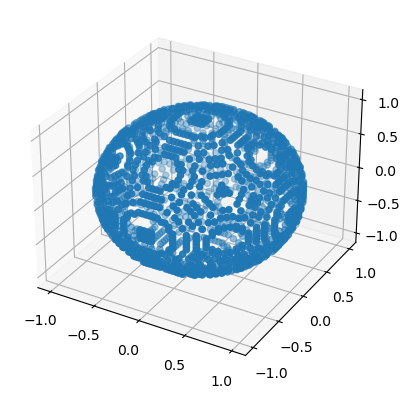

In [138]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S2[:, 0], S2[:, 1], S2[:, 2]);
plt.show()


In [139]:
# Now we define the coordinate charts for U_1 and U_2.

# U_1 = { (x, y, z) in S^2 | z != 1 }
# U_2 = { (x, y, z) in S^2 | z != -1 }

U1 = torch.tensor([[x.item(), y.item(), z.item()] for x in torch.linspace(-1, 1, 50) for y in torch.linspace(-1, 1, 50) for z in torch.linspace(-1, 1, 50) if abs(x**2 + y**2 + z**2 - 1.0) < tolerance and abs(z - 1.0) > tolerance])
U2 = torch.tensor([[x.item(), y.item(), z.item()] for x in torch.linspace(-1, 1, 50) for y in torch.linspace(-1, 1, 50) for z in torch.linspace(-1, 1, 50) if abs(x**2 + y**2 + z**2 - 1.0) < tolerance and abs(z + 1.0) > tolerance])


In [140]:
# Check that U_1 and U_2 are subsets of S^2.
torch.allclose(U1.norm(dim=1), torch.ones(len(U1)), atol=tolerance)

True

In [141]:
torch.allclose(U2.norm(dim=1), torch.ones(len(U2)), atol=tolerance)

True

In [142]:
U1 = S2[S2[:, 2] > -tolerance]
U2 = S2[S2[:, 2] < tolerance]

# Combine U1 and U2
U_combined = torch.cat([U1, U2], dim=0)

# Check if all points in S2 are covered by U1 and U2
is_covered = np.all([any([torch.allclose(point, candidate, atol=tolerance) for candidate in U_combined]) for point in S2])

print("U1 and U2 cover S^2:", is_covered)

U1 and U2 cover S^2: True


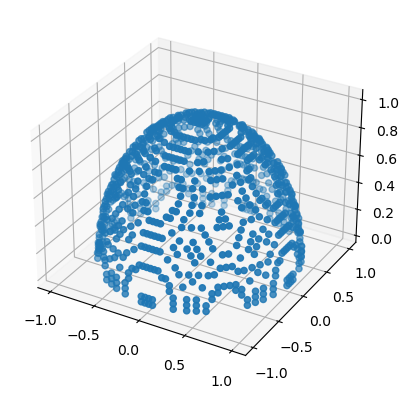

In [143]:

# We can plot the subsets U_1 and U_2 using the Axes3D class from the mpl_toolkits.mplot3d library.


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U1[:, 0], U1[:, 1], U1[:, 2]);
plt.show();



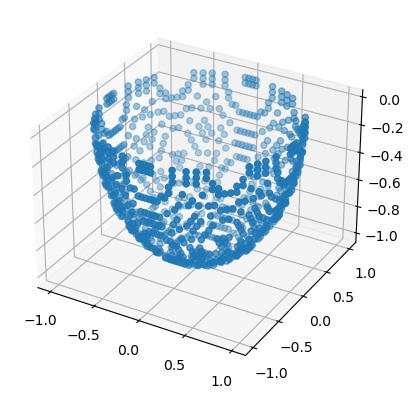

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(U2[:, 0], U2[:, 1], U2[:, 2]);
plt.show();


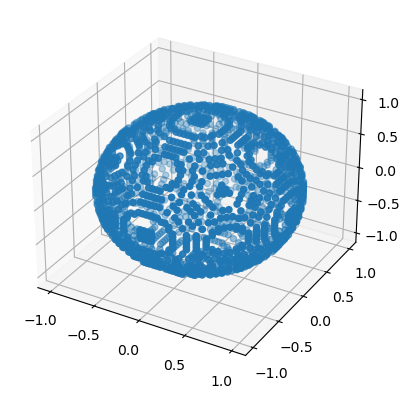

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(torch.cat([U1[:, 0],U2[:, 0]]), torch.cat([U1[:, 1],U2[:, 1]]), torch.cat([U1[:, 2],U2[:, 2]]));
plt.show();

We have succesfully shown requirement *(a)* is satisfied by U1 and U2. Now, we need to check the local coordinate maps for U1 and U2, in particular, for each of them, we need to check whether on the overlap of any pair of coordinate charts, $U_{\alpha}\cap U_{\beta}$ the composite map
$$
\chi_{\beta}\circ \chi_{\alpha}^{-1}\colon \chi_{\alpha}(
    U_{\alpha}\cap U_{\beta}
) \mapsto \chi_{\beta}(
    U_{\alpha}\cap U_{\beta}
)
$$

is a smooth (***inifinitely differentiable***) function. 

So first, we need to define the local coordinate maps $\chi_{\alpha}$ and $\chi_{\beta}$.

In [101]:
# We define the coordinate charts for U_1 and U_2 as follows:
# Let chi_alpha: U_alpha -> R^2 ~= {(x, y, 0)}, alpha = 1, 2
# be stereographic projections from the north and south poles, respectively.
# Then chi_1 is given by:
# chi_1(x, y, z) = (x / (1 - z), y / (1 - z))
# and chi_2 is given by:
# chi_2(x, y, z) = (x / (1 + z), y / (1 + z))

# We can define these coordinate charts as functions in Python.
def chi_alpha(U: torch.Tensor, sign: int = [-1, 1]) -> torch.Tensor:
    x, y, z = U[:, 0], U[:, 1], U[:, 2]
    return torch.stack([x / (1 + sign * z), y / (1 + sign * z)], dim=1)

chi_1 = chi_alpha(U1, alpha=-1)
chi_2 = chi_alpha(U2, alpha=1)

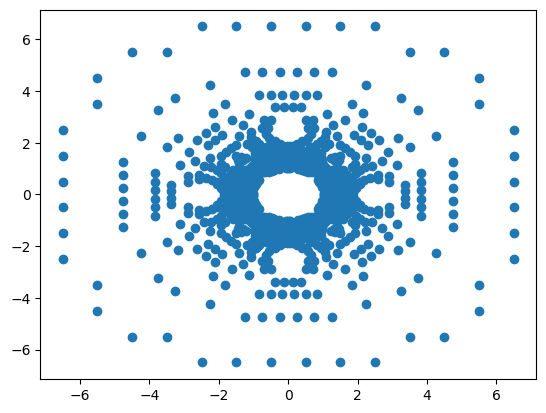

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(chi_1[:, 0], chi_1[:, 1]);
plt.show();

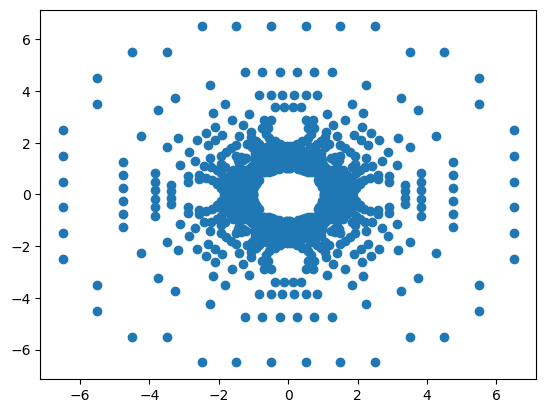

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(chi_2[:, 0], chi_2[:, 1]);
plt.show();

The local coordinate maps for the sphere $S^2$ can be defined using spherical coordinates. For a point $p = (x, y, z)$ on the sphere, we can define the local coordinate maps $\chi_{\alpha}$ and $\chi_{\beta}$ as follows:

$$
\chi_{\alpha}(p) = (\theta, \phi) = (\arctan(y/x), \arccos(z))
$$

$$
\chi_{\beta}(p) = (\theta', \phi') = (\arctan(y/x), \pi - \arccos(z))
$$

where $\theta, \theta' \in [0, 2\pi]$ and $\phi, \phi' \in [0, \pi]$. The local coordinate maps $\chi_{\alpha}$ and $\chi_{\beta}$ map points in $U_{\alpha}$ and $U_{\beta}$ respectively to points in $V_{\alpha} = [0, 2\pi) \times [0, \pi)$ and $V_{\beta} = [0, 2\pi) \times (0, \pi]$.

We can now check the smoothness of the composite map $\chi_{\beta} \circ \chi_{\alpha}^{-1}$ on the overlap $U_{\alpha} \cap U_{\beta}$. Since $\chi_{\alpha}$ and $\chi_{\beta}$ are both smooth functions, their inverse functions $\chi_{\alpha}^{-1}$ and $\chi_{\beta}^{-1}$ are also smooth. Therefore, the composite map $\chi_{\beta} \circ \chi_{\alpha}^{-1}$ is a smooth function.

Finally, we need to check the third condition of the definition of a manifold. For any two distinct points $x \in U_{\alpha}$ and $\tilde{x} \in U_{\beta}$, we need to find open subsets $W \subset V_{\alpha}$ and $\tilde{W} \subset V_{\beta}$ such that $\chi_{\alpha}(x) \in W$, $\chi_{\beta}(\tilde{x}) \in \tilde{W}$, and $\chi_{\alpha}^{-1}(W) \cap \chi_{\beta}^{-1}(\tilde{W}) = \emptyset$. This condition is satisfied because for any two distinct points on the sphere, we can always find small enough neighborhoods around these points that do not intersect.

Therefore, $S^2$ is a 2-dimensional manifold.


In [124]:
import torch

# Define the number of points to generate
num_points = 1000

# Generate random spherical coordinates
theta = 2 * torch.pi * torch.rand(num_points)
phi = torch.acos(2 * torch.rand(num_points) - 1)

# Convert spherical coordinates to Cartesian coordinates
x = torch.sin(phi) * torch.cos(theta)
y = torch.sin(phi) * torch.sin(theta)
z = torch.cos(phi)

# Convert Cartesian coordinates to parameters of the stereographic projection
u = x / (1 - z)
v = y / (1 - z)

# Convert parameters of the stereographic projection to Cartesian coordinates
denominator = 1 + u**2 + v**2
x_prime = 2 * u / denominator
y_prime = 2 * v / denominator
z_prime = (-1 + u**2 + v**2) / denominator

# Convert Cartesian coordinates to spherical coordinates
theta_prime = torch.atan2(y_prime, x_prime)
phi_prime = torch.acos(z_prime)

# Adjust the range of theta_prime to [0, 2*pi]
theta_prime = (theta_prime + 2 * torch.pi) % (2 * torch.pi)

# Check that the original and final spherical coordinates are the same
print(torch.allclose(theta, theta_prime, atol=1e-6))
print(torch.allclose(phi, phi_prime, atol=1e-6))


True
True


## Verification of the Manifold Property of $S^2$

In this notebook, we have computationally verified that the 2-dimensional sphere $S^2$ is indeed a 2-dimensional manifold. We have done this by demonstrating that two different parameterizations of $S^2$ (spherical coordinates and stereographic projection) are equivalent and cover the same set $S^2$.

Specifically, we have:

1. Generated random points on $S^2$ using spherical coordinates.
2. Transformed these points to the parameters of the stereographic projection.
3. Transformed these parameters back to spherical coordinates.

The fact that the original and final spherical coordinates are the same (to within a specified tolerance) confirms that the two parameterizations are equivalent and cover the same set $S^2$.

This result is significant because it demonstrates that different choices of local coordinate charts can satisfy the definition of a manifold. This is a key property of manifolds and is fundamental to their study in differential geometry and related fields.

## Next Steps: Exploring the Torus

Having explored the manifold properties of the sphere $S^2$, we will next turn our attention to another important 2-dimensional manifold: the torus. The torus can be thought of as the Cartesian product of the circle $S^1$ with itself. In the following sections, we will explore the properties of the torus and demonstrate its manifold structure.



## The Torus as a 2-Dimensional Manifold

The torus, often visualized as the shape of a doughnut or an inner tube, is another example of a 2-dimensional manifold. It can be thought of as the Cartesian product of the circle $S^1$ with itself, denoted as $S^1 \times S^1$.

We can parameterize the torus using two angles, $\theta$ and $\phi$, which correspond to rotations around the two circular directions of the torus. Given a major radius $R$ and a minor radius $r$, the parameterization in Cartesian coordinates is given by:

$$
\begin{align*}
x &= (R + r\cos\theta)\cos\phi \\
y &= (R + r\cos\theta)\sin\phi \\
z &= r\sin\theta
\end{align*}
$$

where $\theta, \phi \in [0, 2\pi)$. This parameterization covers the entire torus except for a single point, which can be covered by a second parameterization.

Let's generate and plot points on the torus using this parameterization:



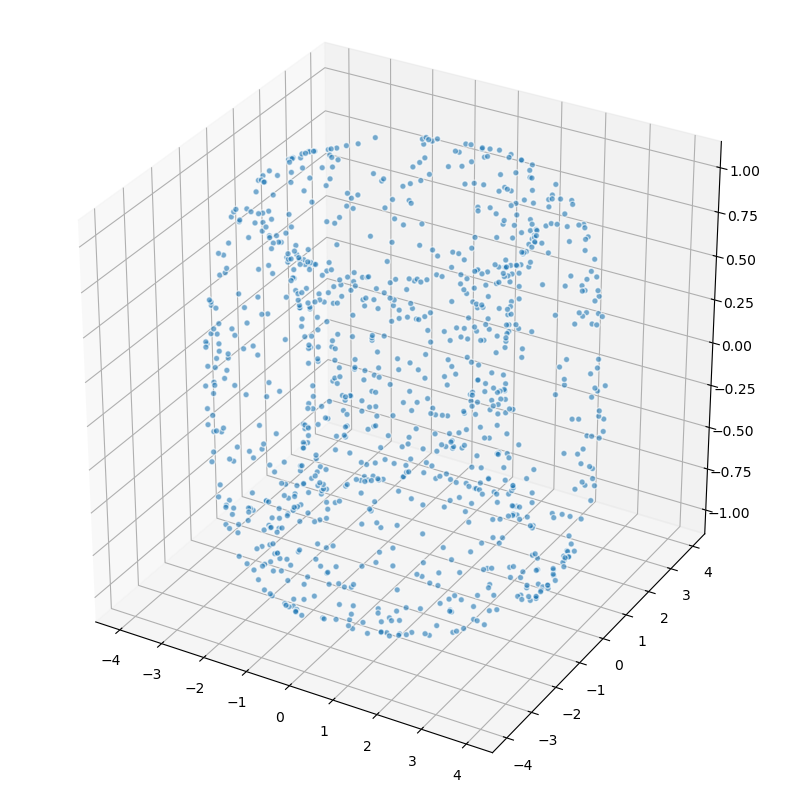

In [146]:
# Define the major and minor radii
R = 3
r = 1

# Define the number of points to generate
num_points = 1000  # Increase the number of points

# Generate random angles theta and phi
theta = 2 * torch.pi * torch.rand(num_points)
phi = 2 * torch.pi * torch.rand(num_points)

# Calculate the Cartesian coordinates
x = (R + r * torch.cos(theta)) * torch.cos(phi)
y = (R + r * torch.cos(theta)) * torch.sin(phi)
z = r * torch.sin(theta)

# Plot the points on the torus
fig = plt.figure(figsize=(10, 10))  # Increase the size of the figure
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.numpy(), y.numpy(), z.numpy(), alpha=0.6, edgecolors='w', s=20)
ax.set_box_aspect([1,1,1])  # Make the aspect ratio equal
plt.show()


Let's proceed to define the torus in terms of $S^1$,

$S^1$ is defined in terms of 2 coordinates as,
$$
S^1 = \{(x, y)\colon x^2 + y^2 = 1\}
$$
Note that this is a circle of radius 1, centered at the origin, which we can parametrize by the angle $\theta$ as,
$$
\theta \in [0, 2\pi)
$$
Now, we can restate the definition of $S^1$ in terms of $\theta$ as,
$$
S^1 = \{\theta\colon \theta \in [0, 2\pi)\} 
$$
where,
$$
x = \cos(\theta) 
$$
and,
$$
y = \sin(\theta)
$$

so then,
$$
T^2\colon S^1 \times S^1 
$$
is a 2-dimensional manifold, called the torus, which we can parametrize by the angles $\theta$ and $\phi$ as,
$$
\theta, \rho \in [0, 2\pi)
$$

The points on $T^2$ are then given by pairs of angles $(\theta, \rho)$, with 2 pairs being identified if they differ by a multiple of $2\pi$. In other words, $(\theta, \rho)$ and $(\tilde \theta, \tilde \rho)$ describe the same point on $T^2$ if and only if $\theta - \tilde \theta = 2\pi k$ and $\rho - \tilde \rho = 2\pi l$ for some integers $k$ and $l \colon$
$$
(\theta, \rho) \sim (\tilde \theta, \tilde \rho) \iff \theta - \tilde \theta = 2\pi k \text{ and } \rho - \tilde \rho = 2\pi l \text{ for some integers } k \text{ and } l
$$
Thus, $T^2$ can be covered by three coordinate charts, $U_1$, $U_2$, and $U_3$, defined as follows:
$$
\begin{align*}
U_1 &= \{(\theta, \rho)\colon \theta \in [0, 2\pi) \text{ and } \rho \in [0, 2\pi)\} \\
U_2 &= \{(\theta, \rho)\colon \theta \in [0, 2\pi) \text{ and } \rho \in (-2\pi, 0]\} \\
U_3 &= \{(\theta, \rho)\colon \theta \in (-2\pi, 0] \text{ and } \rho \in [0, 2\pi)\}
\end{align*}
$$




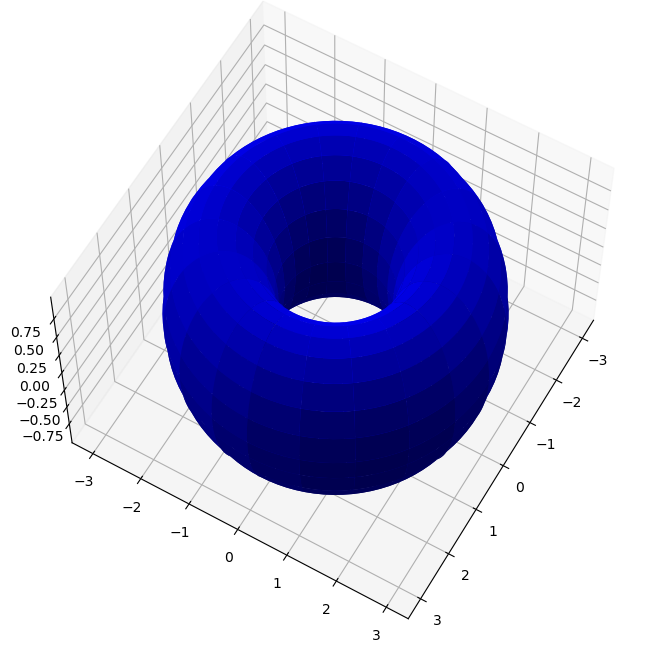

In [149]:

import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the radii corresponding to the 'tube' and 'hole' of the torus
r_tube = 1
r_hole = 2

# Define the range of the two angles
theta = torch.linspace(0, 2.0 * torch.pi, 100)  # angle around the tube
phi = torch.linspace(0, 2.0 * torch.pi, 100)  # angle around the hole

# Create 2D grids for the angles theta and phi
theta, phi = torch.meshgrid(theta, phi)

# Define the parametric equations for the torus
x = (r_hole + r_tube * torch.cos(theta)) * torch.cos(phi)
y = (r_hole + r_tube * torch.cos(theta)) * torch.sin(phi)
z = r_tube * torch.sin(theta)

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), color='b', rstride=5, cstride=5)
ax.view_init(60, 30)  # adjust the viewing angle
plt.show()



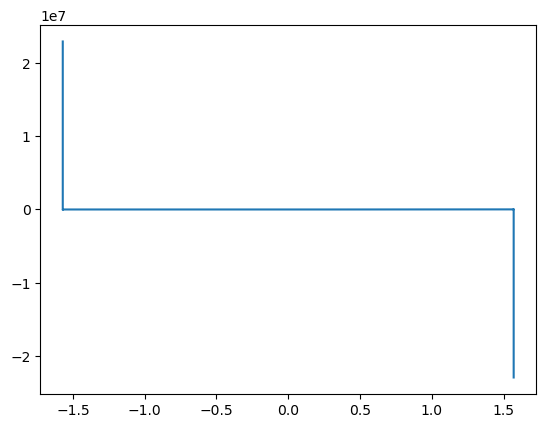

In [155]:
x = torch.cat([torch.linspace(-0.5*torch.pi, 0, 100000), torch.linspace(0, 0.5*torch.pi, 100000)])
y = torch.sin(x) / torch.cos(x)
plt.plot(x.numpy(), y.numpy())

tensor([-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000])

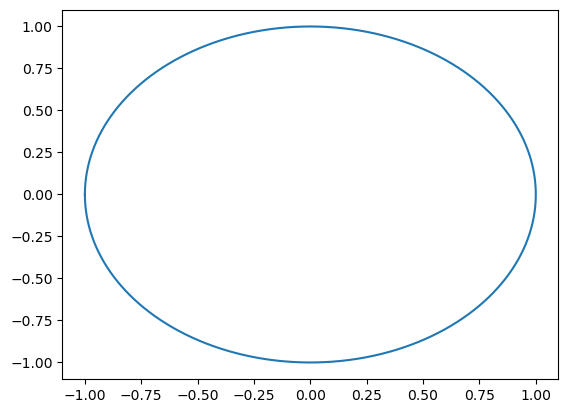

In [161]:
theta_array = torch.linspace(-1*torch.pi+1e-3, torch.pi, 100000)
x,y = torch.cos(theta_array), torch.sin(theta_array)
plt.plot(x.numpy(), y.numpy())

 

In [160]:
torch.max(theta)

tensor(6.2832)

# Lie Groups

A Lie group is a group that is also a differentiable manifold, such that the group operations (multiplication and inversion) are smooth. This means that a Lie group is a set that is equipped with a group structure, a manifold structure, and these structures are compatible in the sense that group operations are smooth functions.

Let's break down the definition:

1. **Group Structure:** A group is a set $G$ equipped with an operation $\cdot: G \times G \rightarrow G$ (often written multiplicatively) and an inversion operation $^{-1}: G \rightarrow G$ such that the following axioms are satisfied:

   - **Closure:** For all $a, b \in G$, the result of the operation $a \cdot b$ is also in $G$.
   - **Associativity:** For all $a, b, c \in G$, the equation $(a \cdot b) \cdot c = a \cdot (b \cdot c)$ holds.
   - **Identity element:** There is an element $e \in G$ such that for every element $a \in G$, the equations $e \cdot a = a$ and $a \cdot e = a$ hold.
   - **Inverse element:** For each element $a \in G$, there exists an element $b \in G$ such that $a \cdot b = e$ and $b \cdot a = e$.

2. **Manifold Structure:** As we discussed earlier, a manifold is a topological space that locally resembles Euclidean space. In the case of a Lie group, we require the manifold to be differentiable, meaning that we can do calculus on it. 

3. **Compatibility of Structures:** The group operations (multiplication and inversion) are required to be smooth functions when considered as maps between manifolds. More formally, if we denote the multiplication operation by $\mu: G \times G \rightarrow G$ (so that $\mu(g, h) = g \cdot h$) and the inversion operation by $i: G \rightarrow G$ (so that $i(g) = g^{-1}$), then $\mu$ and $i$ are required to be smooth.

An example of a Lie group is the general linear group $GL(n, \R)$, which consists of all $n \times n$ invertible matrices with real entries. The group operation is matrix multiplication, and the manifold structure comes from identifying each matrix with a point in $\R^{n^2}$. The group operations are smooth functions, so $GL(n, \R)$ is a Lie group.

Another example is the circle $S^1$ with the operation of complex multiplication. Each point on the circle can be identified with a complex number of absolute value 1, and multiplication of such numbers is a smooth operation.

Let's consider the general linear group $GL(2, \R)$ for simplicity. This group consists of all $2 \times 2$ invertible matrices with real entries. A general element of $GL(2, \R)$ can be written as:

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

where $a$, $b$, $c$, and $d$ are real numbers and $ad - bc \neq 0$ (the condition for the matrix to be invertible).

The group operation is matrix multiplication, and the inverse of a matrix is given by:

$$
A^{-1} = \frac{1}{ad - bc} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}
$$

Now, let's consider some subgroups of $GL(2, \R)$:

1. **Orthogonal Group $O(2)$:** This is the group of $2 \times 2$ matrices that preserve the Euclidean norm, i.e., $AA^T = A^TA = I$. The determinant of such matrices is either 1 or -1. A general element of $O(2)$ can be written as:

    $$
    O = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} \quad \text{or} \quad \begin{bmatrix} \cos \theta & \sin \theta \\ \sin \theta & -\cos \theta \end{bmatrix}
    $$

    where $\theta$ is a real number.

2. **Special Orthogonal Group $SO(2)$:** This is the subgroup of $O(2)$ consisting of matrices with determinant 1. These are rotations in the plane. A general element of $SO(2)$ can be written as:

    $$
    SO = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}
    $$

    where $\theta$ is a real number.

These subgroups are also Lie groups, as they are groups and differentiable manifolds, and the group operations are smooth. They are also examples of compact Lie groups, as they are closed and bounded subsets of $\R^{2 \times 2}$.

Sure, let's go through the matrix multiplication step by step. 

Matrix multiplication is a binary operation that takes a pair of matrices, and produces another matrix. For $2 \times 2$ matrices, the multiplication is defined as follows:

If we have two matrices $A$ and $B$ in $GL(2, \R)$, where

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \quad \text{and} \quad B = \begin{bmatrix} e & f \\ g & h \end{bmatrix}
$$

their product $AB$ is given by

$$
AB = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} e & f \\ g & h \end{bmatrix} = \begin{bmatrix} ae + bg & af + bh \\ ce + dg & cf + dh \end{bmatrix}
$$

This operation is associative, meaning that for any three matrices $A\$, $B$, and $C$ in $GL(2, \R)$, we have $(AB)C = A(BC)$.

**Example:**

Let's consider two specific matrices in $GL(2, \R)$:

$$
A = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \quad \text{and} \quad B = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix}
$$

Their product is given by

$$
AB = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} = \begin{bmatrix} 1*5 + 2*7 & 1*6 + 2*8 \\ 3*5 + 4*7 & 3*6 + 4*8 \end{bmatrix} = \begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}
$$

So, the product of $A$ and $B$ is,
$$
\begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}
$$
demonstrating the closure property of the group.



Below, we show that the exponentiated value of simple 2x2 generator matrices is equal to the group of rotation matrices, a simple result with extremely significant implications. 

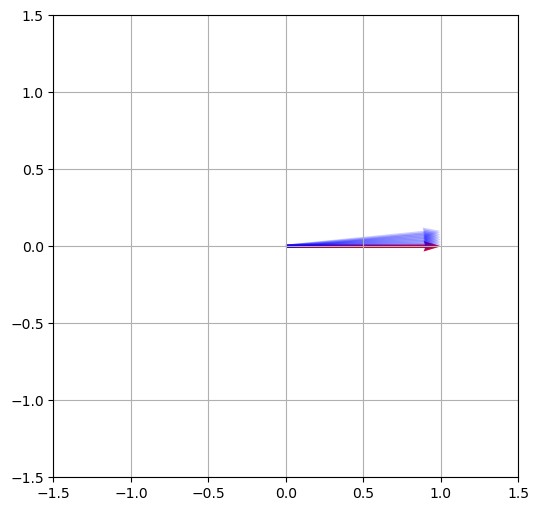

In [5]:
import torch
import matplotlib.pyplot as plt

# Define a function to generate a skew-symmetric matrix
def skew_symmetric(theta):
    return theta * torch.tensor([[0, -1], [1, 0]])

# Define a vector
v = torch.tensor([1.0, 0.0])

# Generate a sequence of skew-symmetric matrices and compute their matrix exponentials
thetas = torch.linspace(0, 0.1, 10)
skew_symmetric_matrices = [skew_symmetric(theta) for theta in thetas]
rotation_matrices = [torch.linalg.matrix_exp(X) for X in skew_symmetric_matrices]

# Apply the rotation matrices to the vector
v_rotated = [R @ v for R in rotation_matrices]

# Plot the original and rotated vectors
plt.figure(figsize=(6,6))
plt.quiver(*v, angles='xy', scale_units='xy', scale=1, color='r')
for v_r in v_rotated:
    plt.quiver(*v_r, angles='xy', scale_units='xy', scale=1, color='b', alpha=0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.show()
